# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

counter = 0
set = 1
temp=[]
lat=[]
lng=[]
hum=[]
cloud=[]
wind=[]
country=[]
max_temp=[]
min_temp=[]
date=[]
cty=[]

for city in cities:
    try:
        
        if counter == 0:
            print("Beginning Data Retrieval")
            print("-----------------------------")
        counter += 1           
        print(f"Processing Record {counter} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        cloud.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cty.append(city)
        time.sleep(1)
        if counter >= 50:
            set += 1
            counter = 0
    except(KeyError, IndexError):
        print("City not found.. Skipping")
        pass
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | sena madureira
Processing Record 5 of Set 1 | nizhneyansk
City not found.. Skipping
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | lamtah
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | armizonskoye
Processing Record 10 of Set 1 | kupang
Processing Record 11 of Set 1 | ostersund
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | sentyabrskiy
City not found.. Skipping
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | amderma
City not found.. Skipping
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | redmond
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | ponta 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
cities_dict = {"City":cty, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Min Temp": min_temp, "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
city_data = pd.DataFrame(cities_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lavrentiya,65.58,-171.00,-6.45,-6.45,90,75,14.29,RU,1609705155
1,georgetown,5.41,100.34,77.00,77.00,94,40,2.24,MY,1609705072
2,ushuaia,-54.80,-68.30,51.80,51.80,50,75,12.75,AR,1609705159
3,sena madureira,-9.07,-68.66,92.16,92.16,48,62,2.57,BR,1609705144
4,hithadhoo,-0.60,73.08,82.62,82.62,77,100,9.15,MV,1609705107


In [60]:
city_data.describe()

,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Date
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,13.08920,11.706200,50.400800,49.540500,76.140000,61.360000,8.300300,1.609705e+09
std,39.46476,102.051903,32.862976,32.615268,18.064989,37.639846,6.914697,7.781953e+01
min,-54.80000,-175.200000,-41.870000,-41.870000,19.000000,0.000000,0.310000,1.609705e+09
25%,-22.01000,-70.800000,32.395000,31.922500,69.000000,20.000000,4.297500,1.609705e+09
50%,12.60000,26.230000,60.405000,57.595000,81.500000,75.000000,5.820000,1.609705e+09
75%,52.89250,108.872500,77.000000,76.242500,89.000000,97.000000,11.165000,1.609705e+09
max,77.48000,169.270000,95.000000,95.000000,100.000000,100.000000,37.130000,1.609705e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
clean_city_data = city_data.loc[city_data["Humidity"] <= 100]
#clean_city_data.head()
clean_city_data.describe()

,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Date
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,13.08920,11.706200,50.400800,49.540500,76.140000,61.360000,8.300300,1.609705e+09
std,39.46476,102.051903,32.862976,32.615268,18.064989,37.639846,6.914697,7.781953e+01
min,-54.80000,-175.200000,-41.870000,-41.870000,19.000000,0.000000,0.310000,1.609705e+09
25%,-22.01000,-70.800000,32.395000,31.922500,69.000000,20.000000,4.297500,1.609705e+09
50%,12.60000,26.230000,60.405000,57.595000,81.500000,75.000000,5.820000,1.609705e+09
75%,52.89250,108.872500,77.000000,76.242500,89.000000,97.000000,11.165000,1.609705e+09
max,77.48000,169.270000,95.000000,95.000000,100.000000,100.000000,37.130000,1.609705e+09


In [76]:
#  Get the indices of cities that have humidity over 100%.
humidity_list = city_data.index[city_data['Humidity'] > 100].tolist()
humidity_list

[]

In [77]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleancity_data = city_data.drop(humidity_list)
cleancity_data.head()

,City,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lavrentiya,65.58,-171.00,-6.45,-6.45,90,75,14.29,RU,1609705155
1,georgetown,5.41,100.34,77.00,77.00,94,40,2.24,MY,1609705072
2,ushuaia,-54.80,-68.30,51.80,51.80,50,75,12.75,AR,1609705159
3,sena madureira,-9.07,-68.66,92.16,92.16,48,62,2.57,BR,1609705144
4,hithadhoo,-0.60,73.08,82.62,82.62,77,100,9.15,MV,1609705107


In [ ]:
city_data.to_csv("Output\City_Data_Output.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

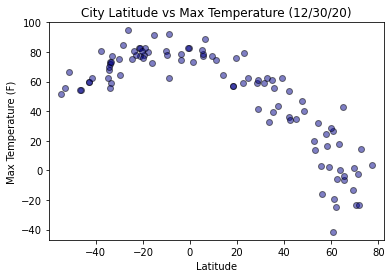

In [62]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Max Temperature (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Output\Lat_MaxTemp_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and their max temperature, 
#reflecting if a max temp increases or decreases as latitude increases.

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

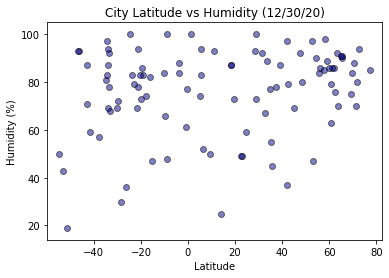

In [63]:
y_values = clean_city_data["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Humidity (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output\Lat_Humidity_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and their humidity,
#showing how a city's latitude impacts it's max humidity.

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

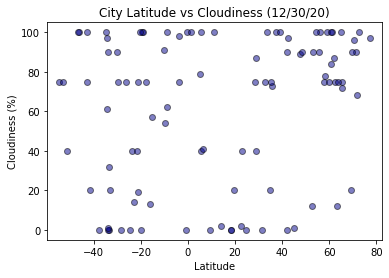

In [64]:
y_values = clean_city_data["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Cloudiness (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output\Lat_Cloudiness_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and the cloudiness,
#to demonstrate how cloudiness behaves as a latitude changes.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

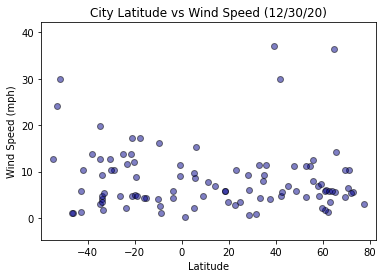

In [65]:
y_values = clean_city_data["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Wind Speed (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output\Lat_WindSpeed_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and wind speed,
#reflecting how wind speed varies as latitude increases.

## Linear Regression

In [66]:
north_hemi = clean_city_data.loc[clean_city_data["Lat"]>=0]
south_hemi = clean_city_data.loc[clean_city_data["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8813820427527239


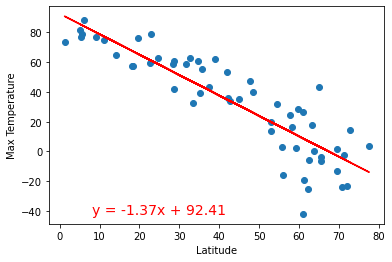

In [67]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(north_hemi["Max Temp"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_MaxTemp_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.684415183122755


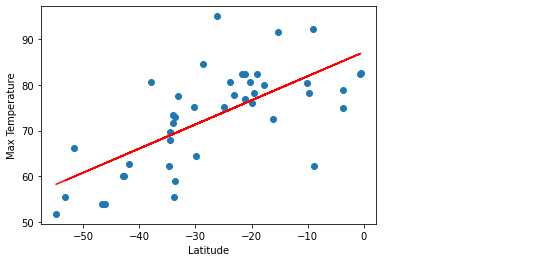

In [68]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(south_hemi["Max Temp"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_MaxTemp_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#These two charts reflect the relationship a city's temperature has with it's latitude.
#We can conclude that as a city is closer to the equator (latitude closer to 0) it's max temperature is higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.25286668784768634


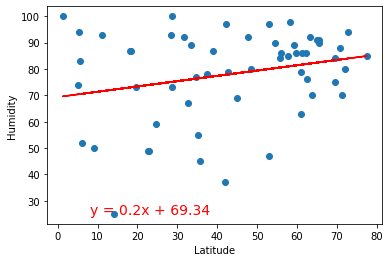

In [70]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(north_hemi["Humidity"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_Humidity_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.20519444320621433


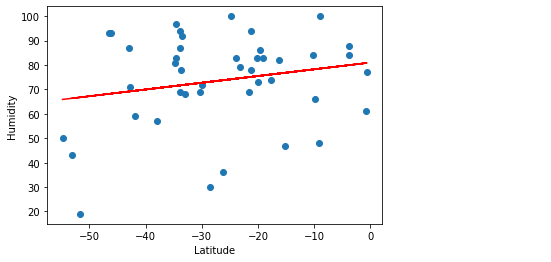

In [69]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(south_hemi["Humidity"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_Humidity_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")
#From the charts and linear regression analysis we can conclude that there isn't a strong relationship
#between humidity and a city's latitude. Initial thoughts would be that as you get nearer to the equator
#humidity would be higher, however data differs from that thought.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.3711700678059218


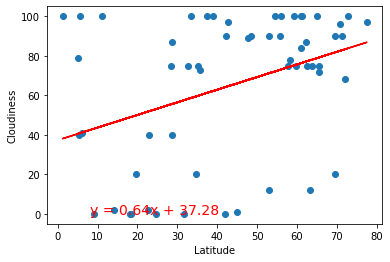

In [71]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(north_hemi["Cloudiness"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_Cloudiness_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.029986977076420666


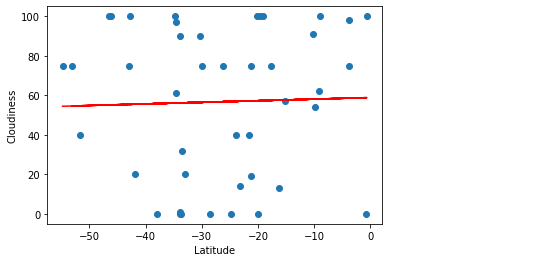

In [72]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(south_hemi["Cloudiness"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_Cloudiness_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#From the charts and the analysis we can deduct that cloudiness increases as we steer away from the equator.
#However, the relationship between these two factors is not very strong, but it exists.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.062496688545602606


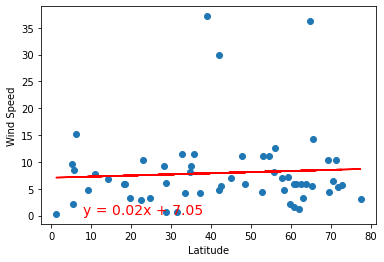

In [73]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(north_hemi["Wind Speed"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_WindSpeed_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.22337197149751364


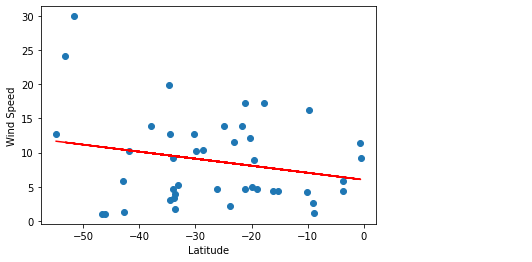

In [74]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(8,min(south_hemi["Wind Speed"])),fontsize=14,color="red")
plt.show
plt.savefig("Output\Lat_WindSpeed_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#After the analysis of wind speed vs latitude we can tell there is a correlation between these two factors. 
#We can conlcude that wind speeds reduce as we are closer to the equator.